In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot
import logging
import tpvalidator.mcprod.workspace as workspace
import tpvalidator.utilities as utils
import tpvalidator.mcprod.analyzers.snn as snn

from rich import print
from tpvalidator.utilities import temporary_log_level, subplot_autogrid, pandas_backend
from tpvalidator.histograms import uproot_hist_mean_std


In [3]:
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.INFO):
    ws = workspace.TriggerPrimitivesWorkspace("../../data/vd/ar39/test_ides/trigtree_tpg_vd_ar39.root")

print(ws.info)

INFO:TriggerPrimitivesWorkspace:tpmakerTPCSimpleThreshold__TriggerPrimitiveMaker found with 3624507 rows


{
    'backtracker': {'TPAlgTPCSimpleThreshold': {'offset_U': 8, 'offset_V': 1, 'offset_X': -7}},
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'tpmakerTPCSimpleThreshold::TriggerPrimitiveMaker': {
            'threshold_tpg_plane0': 23,
            'threshold_tpg_plane1': 23,
            'threshold_tpg_plane2': 26,
            'tool': 'TPAlgTPCSimpleThreshold'
        }
    }
}

In [4]:
ws.ides

,event,run,subrun,channel,timestamp,numelectrons,energy,x,y,z,trackID,origTrackID,pdg_id,parent_pdg_id,readout_plane_id,readout_view,detector_element
0,1,20000047,0,24,824,3.140217,0.000335,-159.647369,-660.258118,17.497156,2688,-999,11,-99999,0,0,0
1,1,20000047,0,24,825,11.719005,0.001249,-159.647369,-660.258118,17.497156,2688,-999,11,-99999,0,0,0
2,1,20000047,0,24,826,33.323917,0.003550,-159.647369,-660.258118,17.497156,2688,-999,11,-99999,0,0,0
3,1,20000047,0,24,827,72.215294,0.007694,-159.647369,-660.258118,17.497156,2688,-999,11,-99999,0,0,0
4,1,20000047,0,24,828,119.279793,0.012708,-159.647369,-660.258118,17.497156,2688,-999,11,-99999,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547279,5,20000047,0,41470,3828,694.103943,0.033318,164.775803,644.975342,894.964722,4747,-999,11,-99999,2,2,47
1547280,5,20000047,0,41470,3829,1130.060791,0.056048,164.774338,644.976624,894.964661,4747,-999,11,-99999,2,2,47
1547281,5,20000047,0,41470,3830,799.852051,0.041003,164.772888,644.977844,894.964478,4747,-999,11,-99999,2,2,47
1547282,5,20000047,0,41470,3831,245.619110,0.013010,164.771469,644.979065,894.964355,4747,-999,11,-99999,2,2,47


498

65037 65535 None

<Axes: >

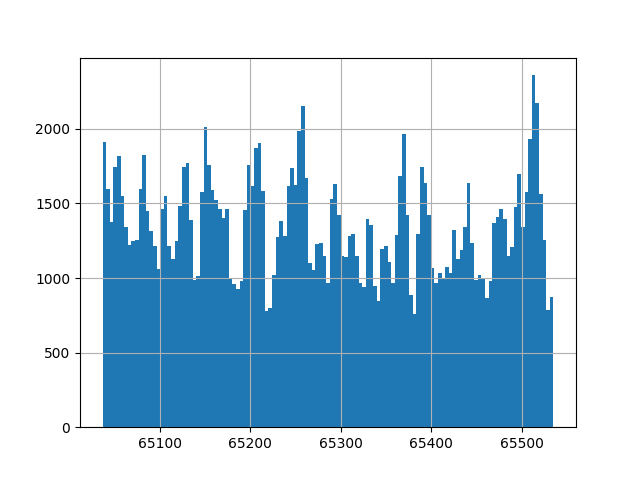

In [17]:
fig, axes = plt.subplots()
odd_ides = ws.ides.query('timestamp > 60000')
print(odd_ides.timestamp.min(), odd_ides.timestamp.max(), print(odd_ides.timestamp.max()-odd_ides.timestamp.min()))
odd_ides.timestamp.hist(bins=125, ax=axes)

In [18]:
pd.options.plotting.backend = 'plotly'
import plotly.express as px
# ws.tps.query('event == 1 & TP_peakADC > 50').plot.scatter(x='TP_channel', y='TP_peakT', size='TP_peakADC', color_continuous_scale=px.colors.sequential.Viridis, height=500, width=600)

pd.options.plotting.backend = 'matplotlib'
with pandas_backend('plotly') as x:
    f = ws.tps.query('event == 1 & adc_peak > 50').plot.scatter(x='channel', y='time_start', size='adc_peak', color="bt_is_signal", color_continuous_scale=px.colors.sequential.Viridis, height=800, width=900)
    f.show()


In [19]:
pd.options.plotting.backend = 'plotly'
import plotly.express as px
# ws.tps.query('event == 1 & TP_peakADC > 50').plot.scatter(x='TP_channel', y='TP_peakT', size='TP_peakADC', color_continuous_scale=px.colors.sequential.Viridis, height=500, width=600)

pd.options.plotting.backend = 'matplotlib'
with pandas_backend('plotly') as x:
    f = ws.tps.query('sample_start < 200 & readout_plane_id == 2 & adc_peak > 50').plot.scatter(x='channel', y='sample_start', size='adc_peak', color="bt_is_signal", color_continuous_scale=px.colors.sequential.Viridis, height=800, width=900)
    f.show()


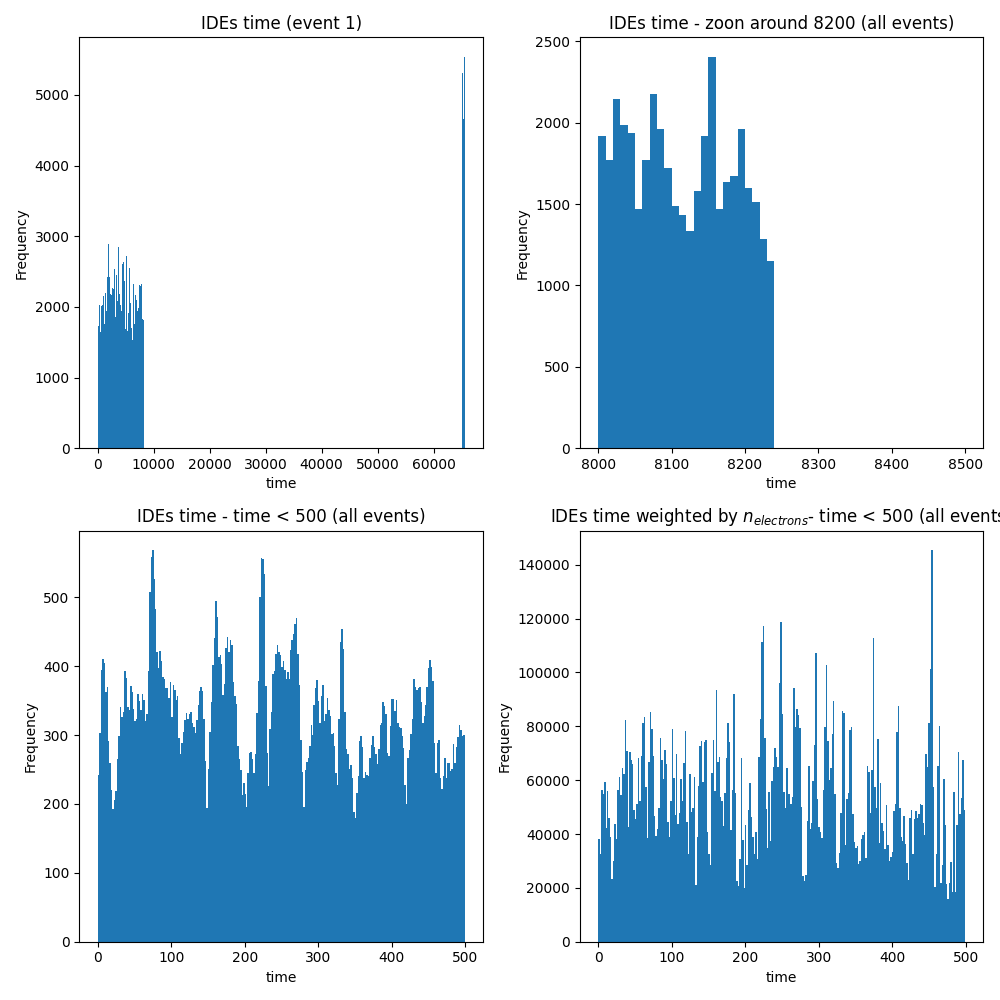

In [20]:
fig, axes = plt.subplots(2,2, squeeze=False, figsize=(10,10))

ax = axes[0,0]
ws.ides.query('event==1').timestamp.plot.hist(bins=1000, ax=ax)
ax.set_xlabel('time')
ax.set_title('IDEs time (event 1)')

ax = axes[0,1]
bins=list(range(8000, 8501, 10))
ws.ides.query('timestamp > 8000 & timestamp < 8500').timestamp.plot.hist(bins=bins, ax=ax)
ax.set_xlabel('time')
ax.set_title('IDEs time - zoon around 8200 (all events)')

early_ides = ws.ides.query('timestamp <  500 ')

ax = axes[1,0]
early_ides.timestamp.plot.hist(bins=250, ax=ax)
ax.set_xlabel('time')
ax.set_title('IDEs time - time < 500 (all events)')

ax = axes[1,1]
early_ides.timestamp.plot.hist(bins=250, weights=early_ides.numelectrons, ax=ax)
ax.set_xlabel('time')
ax.set_title('IDEs time weighted by $n_{electrons}$- time < 500 (all events)')

fig.tight_layout()


Text(0.5, 0.98, 'ide.timestamp > 9000')

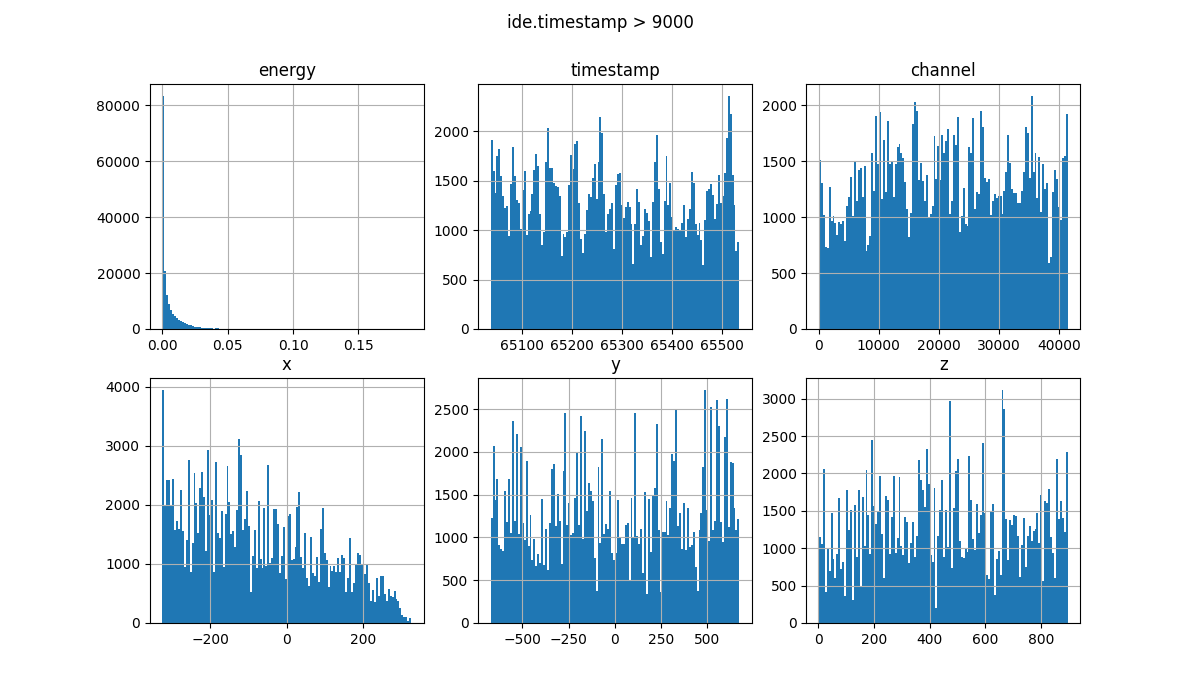

In [21]:
fig,axes = plt.subplots(2,3, figsize=(12,7))

q='timestamp > 9000 & event<100'
b=128

ax=axes[0][0]
ws.ides.query(q).energy.hist(ax=ax, bins=b)
ax.set_title('energy')

ax=axes[0][1]
ws.ides.query(q).timestamp.hist(ax=ax, bins=b)
ax.set_title('timestamp')

ax=axes[0][2]
ws.ides.query(q).channel.hist(ax=ax, bins=b)
ax.set_title('channel')

ax=axes[1][0]
ws.ides.query(q).x.hist(ax=ax, bins=b)
ax.set_title('x')

ax=axes[1][1]
ws.ides.query(q).y.hist(ax=ax, bins=b)
ax.set_title('y')

ax=axes[1][2]
ws.ides.query(q).z.hist(ax=ax, bins=b)
ax.set_title('z')

fig.suptitle('ide.timestamp > 9000')

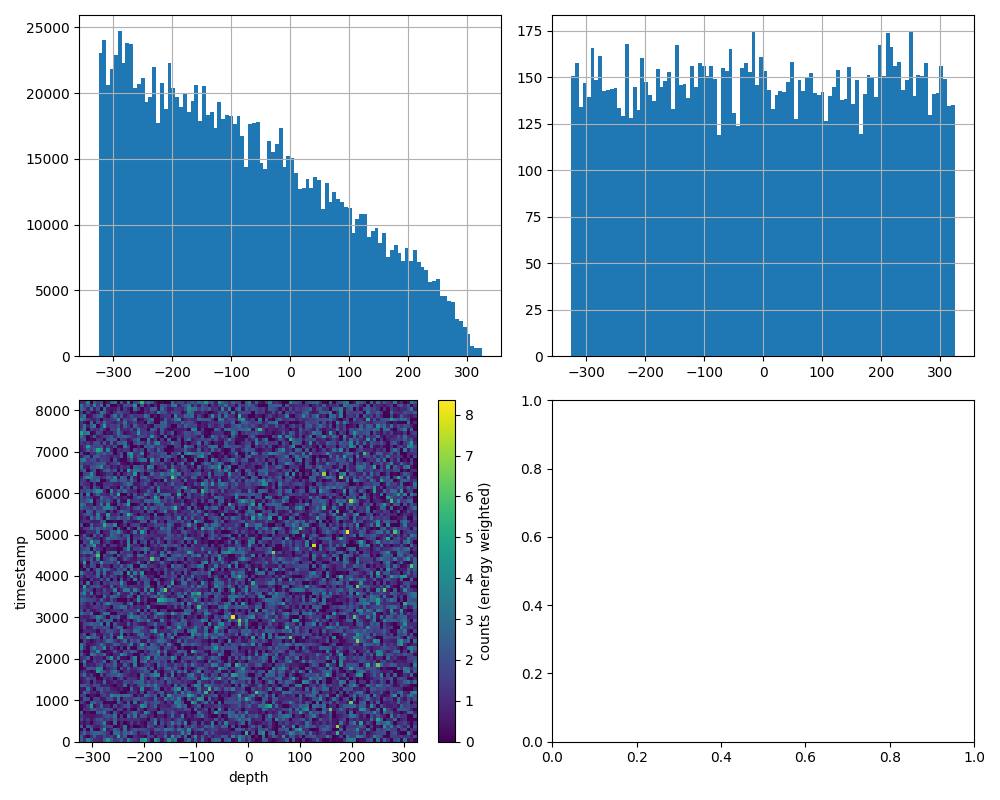

In [26]:
import matplotlib as mpl
fig, axes = plt.subplots(2,2, figsize=(10,8))
norm=mpl.colors.LogNorm()

ides_clean = ws.ides.query('timestamp < 10000')


ax=axes[0][0]
ides_clean.x.hist(bins=100, ax=ax)
ax=axes[0][1]
ides_clean.x.hist(bins=100, weights=ides_clean.energy, ax=ax)
ax = axes[1][0]
h2d = ax.hist2d(ides_clean.x, ides_clean.timestamp, weights=ides_clean.energy, bins=(100, 100))
ax.set_ylabel('timestamp')
ax.set_xlabel('depth')
cbar = fig.colorbar(h2d[3], ax=ax)
cbar.set_label('counts (energy weighted)')
fig.tight_layout()

<Axes: >

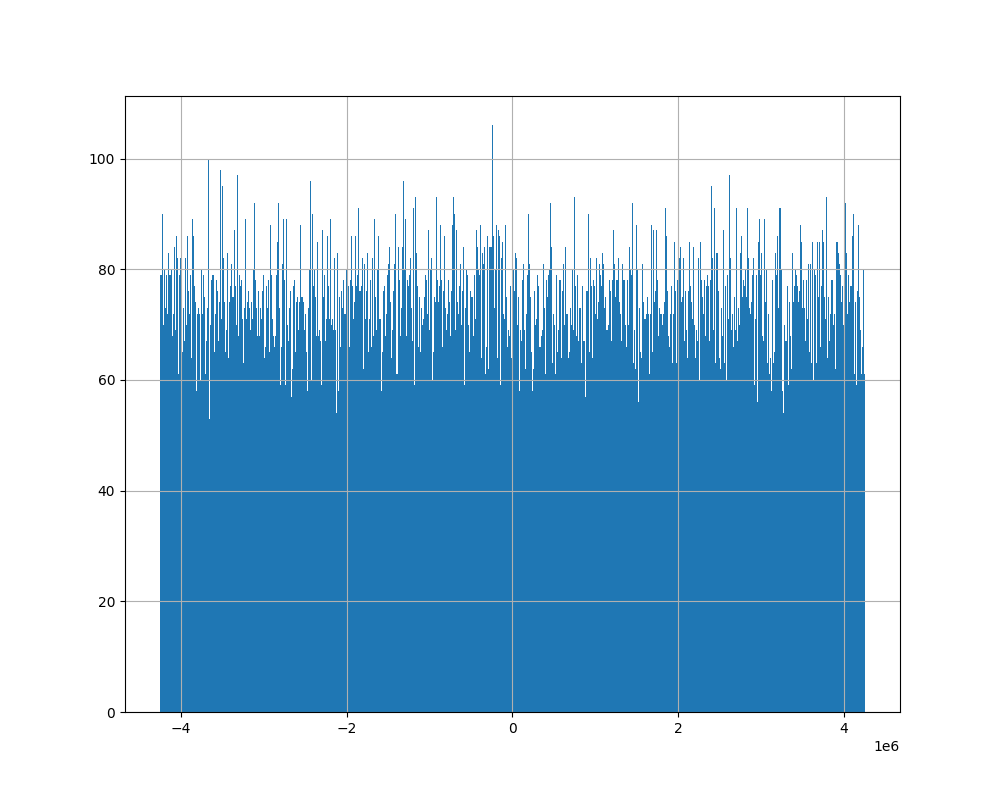

In [31]:
fig, axes = plt.subplots(1,1, squeeze=False, figsize=(10,8))

ax = axes[0,0]
ws.mcparticles.t.hist(ax=ax, bins=1000)